This notebook has the (hopefully correct) answers for MLzoomcamp's week 8 homework assignment for the 2024 cohort.

https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2024/08-deep-learning/homework.md

In this homework, we'll build a model for classifying various hair types. For this, we will use the Hair Type dataset that was obtained from Kaggle and slightly rebuilt.

        wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/straight-curly-data/data.zip
        unzip data.zip

Model architechture instructions:


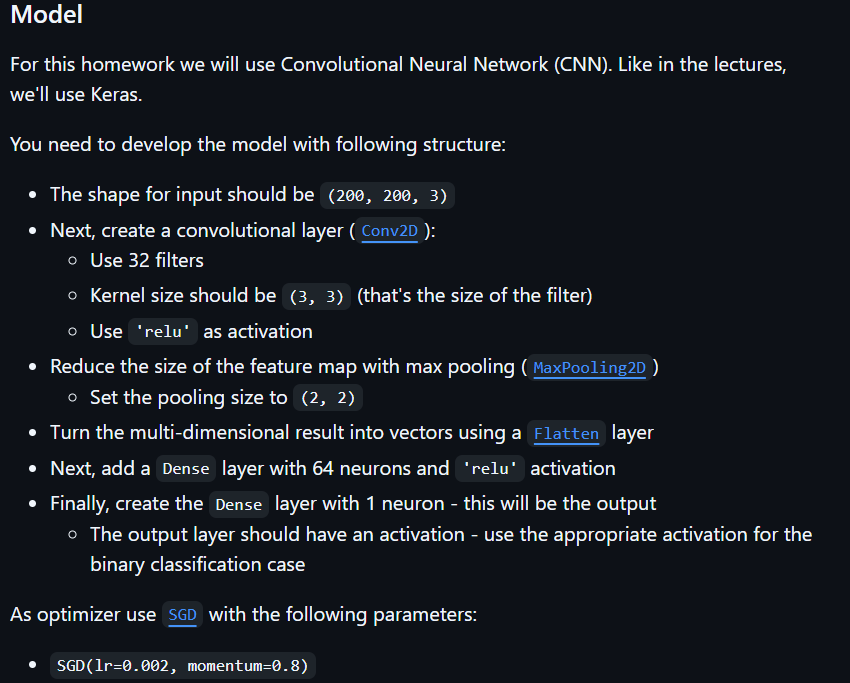

My interpretation:

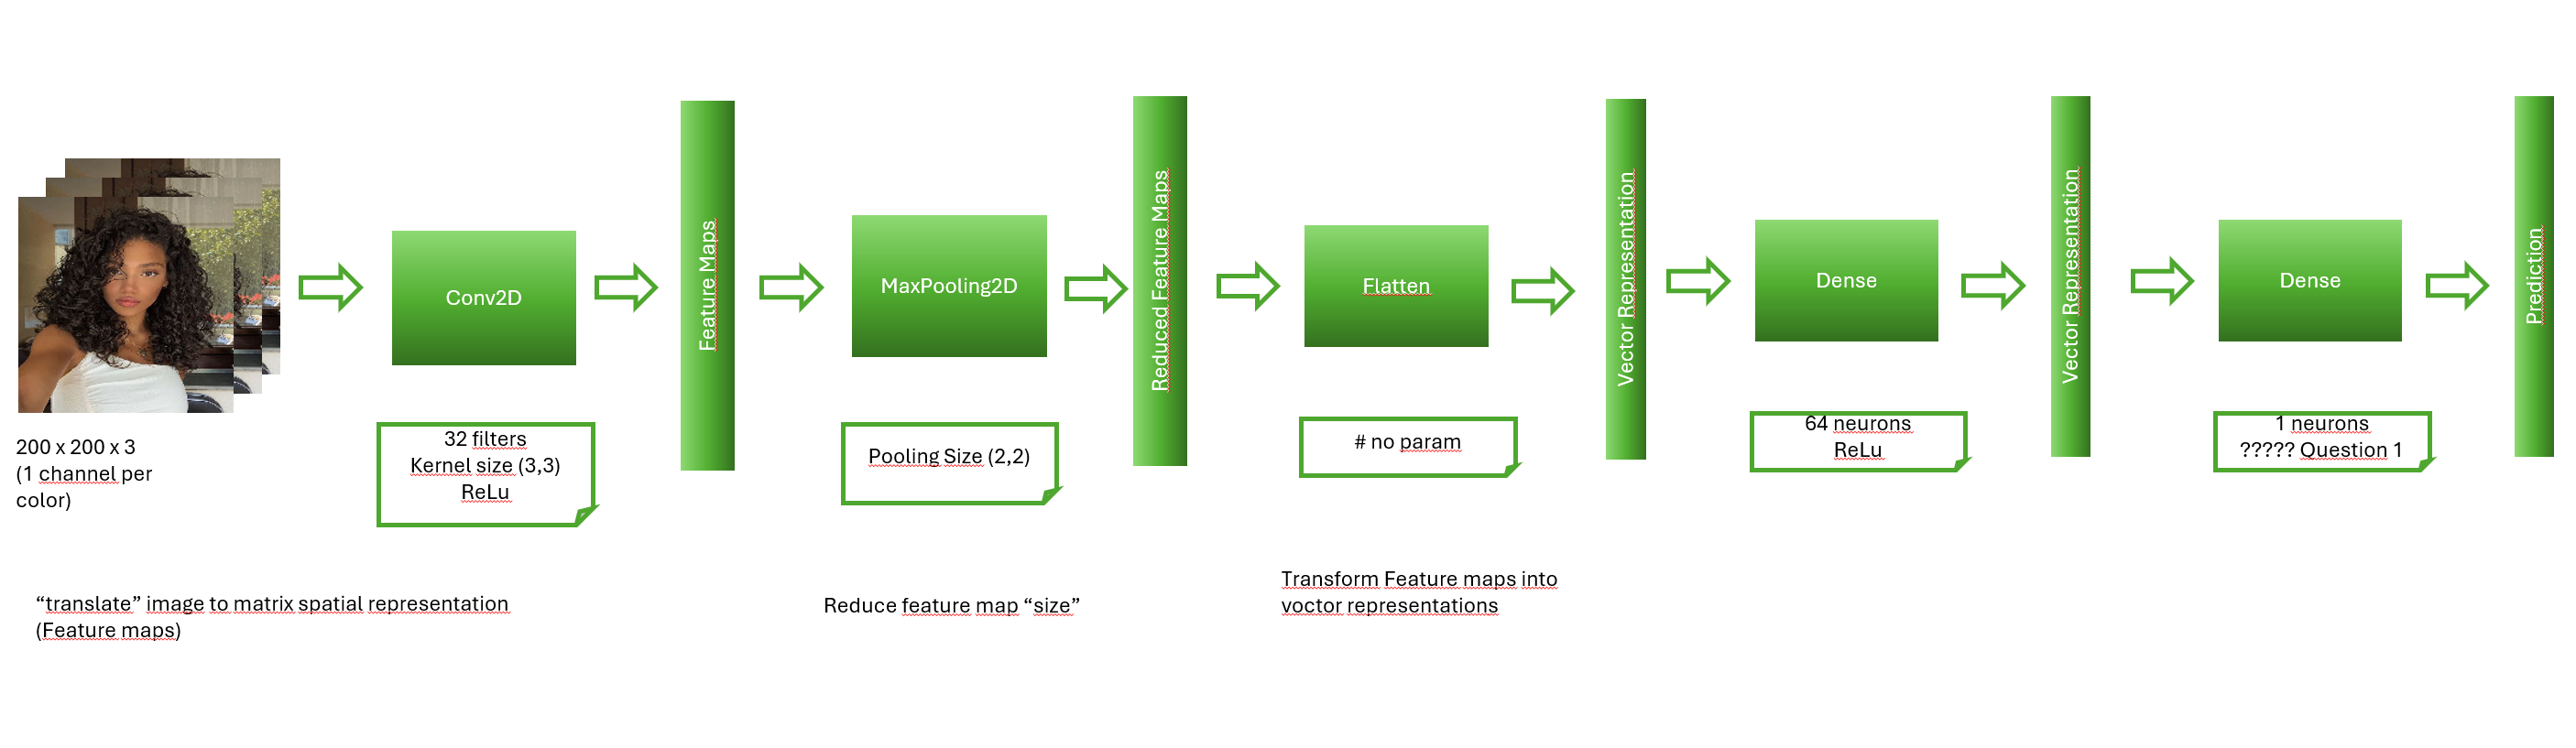

Import Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

%matplotlib inline


Reproducibility

Set Seed generators

In [2]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

Configure Input

Load one image as an example

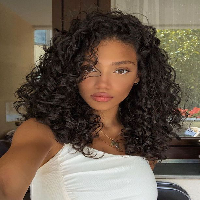

In [3]:
path = 'data/data/train/curly'
name = '00cbad1ffe22d900018e5a2e7376daed4.jpg'
fullname = f'{path}/{name}'
load_img(fullname, target_size=(200, 200))

In [4]:
img = load_img(fullname, target_size=(200, 200))
x = np.array(img)
x.shape

(200, 200, 3)

Import images from tainning folder


In [5]:
train_gen = ImageDataGenerator()

train_ds = train_gen.flow_from_directory(
    './data/data/train',
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary'
)

Found 800 images belonging to 2 classes.


Show data set indices

In [6]:
train_ds.class_indices

{'curly': 0, 'straight': 1}

In [7]:
print(train_ds)

In [8]:
val_gen = ImageDataGenerator()

val_ds = val_gen.flow_from_directory(
    './data/data/test',
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary'
)

Found 201 images belonging to 2 classes.


In [9]:
val_ds.class_indices

{'curly': 0, 'straight': 1}

Define Model

In [10]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid') 
    ])

Compile Model

In [11]:
optimizer = SGD(learning_rate=0.002, momentum=0.8) # As stated in instructions
lf=tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer=optimizer,
              loss=lf,                          # Loss function
              metrics=['accuracy'])             # metrics

Train the model

In [12]:
history = model.fit(train_ds, epochs=10, batch_size=32,validation_data=val_ds)

Epoch 1/10
25/25 [==============================] - 27s 493ms/step - loss: 1859.7188 - accuracy: 0.5025 - val_loss: 0.6932 - val_accuracy: 0.5075
Epoch 2/10
25/25 [==============================] - 11s 423ms/step - loss: 0.6913 - accuracy: 0.5138 - val_loss: 0.6930 - val_accuracy: 0.5124
Epoch 3/10
25/25 [==============================] - 10s 404ms/step - loss: 0.6923 - accuracy: 0.5138 - val_loss: 0.6930 - val_accuracy: 0.5124
Epoch 4/10
25/25 [==============================] - 10s 421ms/step - loss: 0.6921 - accuracy: 0.5138 - val_loss: 0.6930 - val_accuracy: 0.5124
Epoch 5/10
25/25 [==============================] - 11s 427ms/step - loss: 0.6921 - accuracy: 0.5138 - val_loss: 0.6929 - val_accuracy: 0.5124
Epoch 6/10
25/25 [==============================] - 10s 400ms/step - loss: 0.6921 - accuracy: 0.5138 - val_loss: 0.6929 - val_accuracy: 0.5124
Epoch 7/10
25/25 [==============================] - 10s 411ms/step - loss: 0.6920 - accuracy: 0.5138 - val_loss: 0.6929 - val_accuracy: 0.5

This model hasn't learn a lot, it advances in the first and second epoch, but the final performance is poor

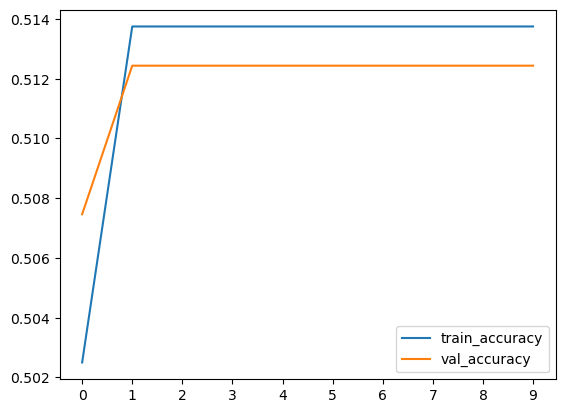

In [13]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xticks(np.arange(10))
plt.legend()

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 313632)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                20072512  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 20,073,473
Trainable params: 20,073,473
Non-trainable params: 0
_________________________________________________________________


Now the homework states that we have to normalize the values in the input images, so let's see what hapens

In [15]:
train_gen_reg = ImageDataGenerator(rescale=1./255)

train_ds_reg = train_gen_reg.flow_from_directory(
    './data/data/train',
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 800 images belonging to 2 classes.


In [16]:
val_gen_reg = ImageDataGenerator(rescale=1./255)

val_ds_reg = val_gen_reg.flow_from_directory(
    './data/data/test',
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 201 images belonging to 2 classes.


In [17]:
history_normalized = model.fit(train_ds_reg, epochs=10,validation_data=val_ds_reg,batch_size=20)

Epoch 1/10


KeyboardInterrupt: 

At this point i think we're mixing things as the first run of the model had an unprocessed input (values from 0 to 255), and the second run had a normalized version (values from 0 to 1), so there is inconsistency in the training data. The result is that there is no change in the loss or accuracy for training and validation. I'll run it one more time, to check if theres any change.

In [ ]:
history_normalized = model.fit(train_ds_reg, epochs=5,validation_data=val_ds_reg,batch_size=20)

Epoch 1/5
40/40 [==============================] - 12s 292ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6928 - val_accuracy: 0.5124
Epoch 2/5
40/40 [==============================] - 12s 308ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6928 - val_accuracy: 0.5124
Epoch 3/5
40/40 [==============================] - 11s 279ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6928 - val_accuracy: 0.5124
Epoch 4/5
40/40 [==============================] - 11s 280ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6928 - val_accuracy: 0.5124
Epoch 5/5
40/40 [==============================] - 11s 285ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6928 - val_accuracy: 0.5124


No change in results, it means the model is not learning anything, so i'll try to run it again with regular inputs and then again with normalized, i'll just try for 5 epochs to speed up the experimentation

In [ ]:
model.fit(train_ds, epochs=5, batch_size=32,validation_data=val_ds)

Epoch 1/5
25/25 [==============================] - 11s 458ms/step - loss: 0.6920 - accuracy: 0.5138 - val_loss: 0.6929 - val_accuracy: 0.5124
Epoch 2/5
25/25 [==============================] - 11s 446ms/step - loss: 0.6920 - accuracy: 0.5138 - val_loss: 0.6929 - val_accuracy: 0.5124
Epoch 3/5
25/25 [==============================] - 11s 438ms/step - loss: 0.6919 - accuracy: 0.5138 - val_loss: 0.6929 - val_accuracy: 0.5124
Epoch 4/5
25/25 [==============================] - 11s 440ms/step - loss: 0.6920 - accuracy: 0.5138 - val_loss: 0.6929 - val_accuracy: 0.5124
Epoch 5/5
25/25 [==============================] - 11s 433ms/step - loss: 0.6919 - accuracy: 0.5138 - val_loss: 0.6929 - val_accuracy: 0.5124


This time there was some improvement, but mostly on the trainning accuracy, the validation results are the same

In [ ]:
history_normalized = model.fit(train_ds_reg, epochs=5,validation_data=val_ds_reg,batch_size=20)

Epoch 1/5
40/40 [==============================] - 11s 280ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6928 - val_accuracy: 0.5124
Epoch 2/5
40/40 [==============================] - 11s 277ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6928 - val_accuracy: 0.5124
Epoch 3/5
40/40 [==============================] - 11s 278ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6928 - val_accuracy: 0.5124
Epoch 4/5
40/40 [==============================] - 11s 279ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6928 - val_accuracy: 0.5124
Epoch 5/5
40/40 [==============================] - 12s 287ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6928 - val_accuracy: 0.5124


In this mixed scenario, we only get improvement with the regular input. It makes sense as it includes greater values than normalized

Let's try with a fresh model with only normalized inputs

In [ ]:
fresh_model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid') 
    ])

In [ ]:
optimizer = SGD(learning_rate=0.002, momentum=0.8)
lf=tf.keras.losses.BinaryCrossentropy()
fresh_model.compile(optimizer=optimizer,
              loss=lf,
              metrics=['accuracy'])

In [ ]:
history_fresh_model = fresh_model.fit(train_ds_reg, epochs=10, batch_size=20,validation_data=val_ds_reg)

Epoch 1/10
40/40 [==============================] - 13s 304ms/step - loss: 0.6786 - accuracy: 0.6125 - val_loss: 0.6668 - val_accuracy: 0.5274
Epoch 2/10
40/40 [==============================] - 11s 274ms/step - loss: 0.6212 - accuracy: 0.6225 - val_loss: 0.6232 - val_accuracy: 0.6269
Epoch 3/10
40/40 [==============================] - 12s 292ms/step - loss: 0.5933 - accuracy: 0.6812 - val_loss: 0.6340 - val_accuracy: 0.6269
Epoch 4/10
40/40 [==============================] - 12s 289ms/step - loss: 0.5637 - accuracy: 0.6938 - val_loss: 0.6200 - val_accuracy: 0.6517
Epoch 5/10
40/40 [==============================] - 12s 288ms/step - loss: 0.5545 - accuracy: 0.7100 - val_loss: 0.6052 - val_accuracy: 0.6617
Epoch 6/10
40/40 [==============================] - 11s 277ms/step - loss: 0.5257 - accuracy: 0.7350 - val_loss: 0.5979 - val_accuracy: 0.6567
Epoch 7/10
40/40 [==============================] - 12s 292ms/step - loss: 0.5033 - accuracy: 0.7638 - val_loss: 0.6280 - val_accuracy: 0.6318

This one learns way better, a fine demonstration of the benefits of the normalization technique

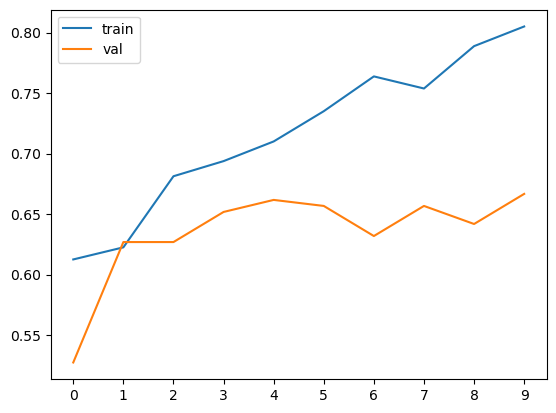

In [ ]:
plt.plot(history_fresh_model.history['accuracy'], label='train')
plt.plot(history_fresh_model.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

Question 3
What is the median of training accuracy for all the epochs for this model?

In [ ]:
np.median(history_fresh_model.history['accuracy'])

0.7224999964237213

Question 4
What is the standard deviation of training loss for all the epochs for this model?

In [ ]:
np.std(history_fresh_model.history['loss'])

0.07247085523323582

## Data Augmentation

Now the assignment proposes to augment the input data by adding modified versions of the training data

In [ ]:
train_gen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_ds_augmented = train_gen_augmented.flow_from_directory(
    './data/data/train',
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 800 images belonging to 2 classes.


With this we'll continue to train our model and let's see what happens

In [ ]:
history_fresh_model = fresh_model.fit(train_ds_augmented, epochs=10, batch_size=32,validation_data=val_ds_reg)

Epoch 1/10
40/40 [==============================] - 18s 449ms/step - loss: 0.6274 - accuracy: 0.6525 - val_loss: 0.6058 - val_accuracy: 0.6766
Epoch 2/10
40/40 [==============================] - 17s 417ms/step - loss: 0.6036 - accuracy: 0.6787 - val_loss: 0.5924 - val_accuracy: 0.7015
Epoch 3/10
40/40 [==============================] - 16s 402ms/step - loss: 0.6117 - accuracy: 0.6775 - val_loss: 0.5861 - val_accuracy: 0.6816
Epoch 4/10
40/40 [==============================] - 16s 411ms/step - loss: 0.5933 - accuracy: 0.6787 - val_loss: 0.5782 - val_accuracy: 0.6915
Epoch 5/10
40/40 [==============================] - 16s 398ms/step - loss: 0.5952 - accuracy: 0.6712 - val_loss: 0.5929 - val_accuracy: 0.6866
Epoch 6/10
40/40 [==============================] - 16s 404ms/step - loss: 0.5829 - accuracy: 0.6988 - val_loss: 0.5708 - val_accuracy: 0.6965
Epoch 7/10
40/40 [==============================] - 151s 499ms/step - loss: 0.5688 - accuracy: 0.7175 - val_loss: 0.5775 - val_accuracy: 0.716

Question 5
Let's train our model for 10 more epochs using the same code as previously.

Note: make sure you don't re-create the model - we want to continue training the model we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

In [ ]:
np.mean(history_fresh_model.history['val_loss'])

0.582697594165802

Question 6
What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

In [ ]:
np.average(history_fresh_model.history['val_accuracy'][5:])

0.7094527363777161

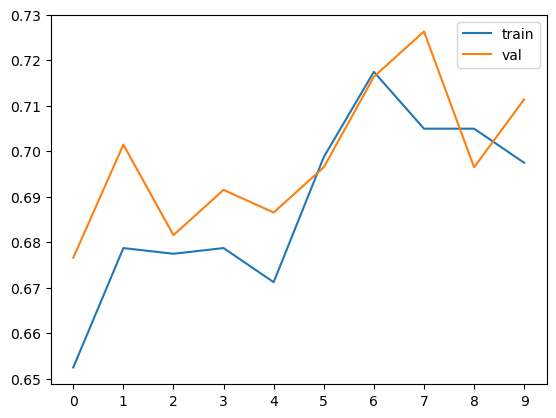

In [ ]:
plt.plot(history_fresh_model.history['accuracy'], label='train')
plt.plot(history_fresh_model.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()